<a href="https://colab.research.google.com/github/charan129/heartAttackPrediction/blob/main/dataAnalysisProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Heart Attack Analysis and Prediction**

---This dataset contains information about people and there chances of having a heart stroke.



**Objective:**


*   With the dataset provided for heart analysis, we have to analyse the possibilities of heart attack on the basis of various features, and then the prediction from the analysis will tell us that whether an individual is prone to heart attack or not. 
*   The detailed analysis can proceed with the exploratory data analysis (EDA). 
*   The classification for predication can be done using various machine learning model algorithms, choose the best suited model for heart attack analysis



**Dataset Information:**

    * Age : Age of the patient
    * Gender : Gender of the patient
    * exang: exercise induced angina (1 = yes; 0 = no)
    * ca: number of major vessels (0-3)
    * cp : Chest Pain type chest pain type
        Value 1: typical angina
        Value 2: atypical angina
        Value 3: non-anginal pain
        Value 4: asymptomatic
    * trtbps : resting blood pressure (in mm Hg)
    * chol : cholestoral in mg/dl fetched via BMI sensor
    * fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    * rest_ecg : resting electrocardiographic results
        Value 0: normal
        Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
        Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
    * thalach : maximum heart rate achieved
    * target :
        0 = less chance of heart attack
        1 = more chance of heart attack


In [1]:
#import packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings as wr
wr.filterwarnings("ignore") #to ignore warnings

In [5]:
#Reading the CSV file and storing in a variable

url = "https://raw.githubusercontent.com/charan129/heartAttackPrediction/main/heart.csv"
df = pd.read_csv(url);

In [6]:
#looking at the first 5 rows of our data

df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1




  **Observation:**

*    You can see know all the columns are already in int or float data types.
*    here output is outcome feature to predict



In [7]:
df.tail()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [8]:
print('Number of rows are :-',df.shape[0], ',and number of columns are :-',df.shape[1])

Number of rows are :- 303 ,and number of columns are :- 14


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB




  **Observation:**

   * you can see that there are no missing rows in the entire dataset. so we do not need to fil/drop any value
   * All the columns except oldpeak (float) are of int data type.



In [10]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64



  **Observation**: There are no missing values.


In [12]:
#counting duplicate 

df.duplicated().sum()

1



There is 1 duplicate row. Let's drop it!


In [13]:
df.drop_duplicates(inplace=True)
print('Number of rows are :',df.shape[0], ',and number of columns are :',df.shape[1])

Number of rows are : 302 ,and number of columns are : 14


In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,302.0,54.420530,9.047970,29.0,48.00,55.5,61.00,77.0
sex,302.0,0.682119,0.466426,0.0,0.00,1.0,1.00,1.0
cp,302.0,0.963576,1.032044,0.0,0.00,1.0,2.00,3.0
trtbps,302.0,131.602649,17.563394,94.0,120.00,130.0,140.00,200.0
chol,302.0,246.500000,51.753489,126.0,211.00,240.5,274.75,564.0
fbs,302.0,0.149007,0.356686,0.0,0.00,0.0,0.00,1.0
restecg,302.0,0.526490,0.526027,0.0,0.00,1.0,1.00,2.0
thalachh,302.0,149.569536,22.903527,71.0,133.25,152.5,166.00,202.0
exng,302.0,0.327815,0.470196,0.0,0.00,0.0,1.00,1.0
oldpeak,302.0,1.043046,1.161452,0.0,0.00,0.8,1.60,6.2




  **Observation:**

  *  The average blood pressure of an individual is 130 whereas the maximun value goes upto 200.
  *  The average heart rate of the group is 152, whereas overall it ranges between 133 to 202
    Age of the group varies from 29 to 77 and the mean age is 55.5



In [16]:
#This is to look at what all unique values have in this dataset

list_col=['sex','chol','trtbps','cp','thall','exng']

for col in list_col: 
    print('{} :{} ' . format(col.upper(),df[col].unique()))

SEX :[1 0] 
CHOL :[233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 188 282 185 326 274 164 307
 249 341 407 217 174 281 289 322 299 300 293 184 409 259 200 327 237 218
 319 166 311 169 187 176 241 131] 
TRTBPS :[145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164] 
CP :[3 2 1 0] 
THALL :[1 2 3 0] 
EXNG :[0 1] 




**Observation:**

  * There are two sex : 0 and 1
  * The highest cholestrol level is 564 and the lowest is 126.
  *  Resting Blood Pressure of individuals vary between 94 to 200.
  *  There are 4 types of chest pain.
  *  exercise induced angina has 2 types (1 = yes; 0 = no)





  **Univariate Analysis**

> 

  *Categorical and Target features*








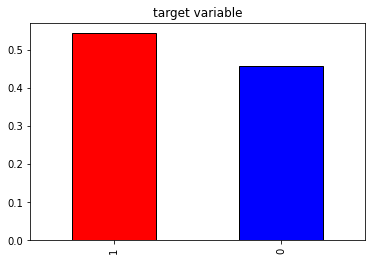

In [18]:
# target variable

df['output'].value_counts(normalize=True).plot.bar(color=['red','blue'],edgecolor='black',title='target variable')



    * Around 55% people have more chances to get heart attack
    * Around 45% people have less chances to get heart attack



In [19]:
df.rename(columns={'sex': 'gender'}, inplace=True)



*Gender Feature*


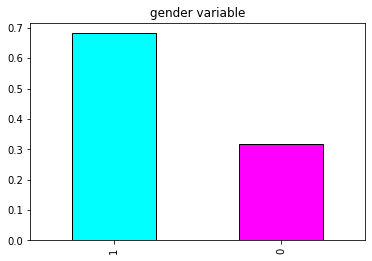

In [23]:
# gender variable

df['gender'].value_counts(normalize=True).plot.bar(color=['cyan','magenta'],edgecolor='black',title='gender variable')




    * Around 68 % people are with sex=1
    * Around 30 % people are with sex=0






*Chest Pain Feature*


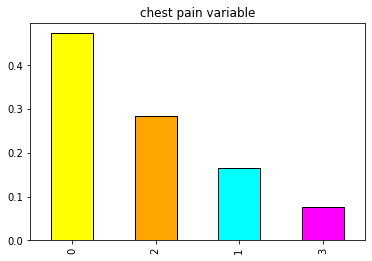

In [24]:
# cp variable

df['cp'].value_counts(normalize=True).plot.bar(color=['yellow','orange','cyan','magenta'],edgecolor='black',title='chest pain variable')



    * Around 50 % of the people have chest pain type: Typical Angina
    * Around 28 % of the people have chest pain type: Non-anginal Pain
    * Around less than 20 % of the people have chest pain type: Atypical Angina
    * Around less than 10% of the people have chest pain type: Asymptomatic





1. Exercise induced angina Variable

2. Fasting Blood sugar > 120 mg/dl Variable

3. Resting Electrocardiographic results Variable

4. Slope




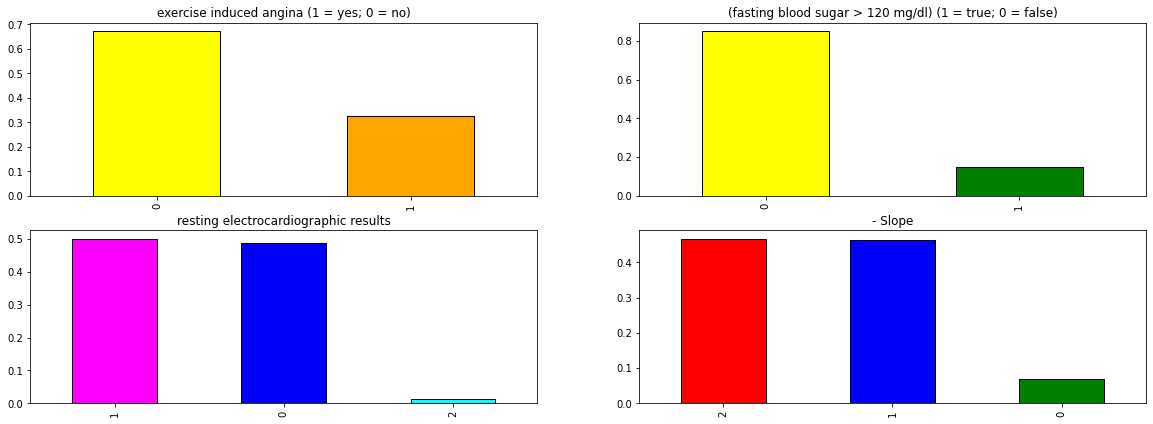

In [25]:
plt.figure(figsize=(20,7))
plt.subplot(221)
df['exng'].value_counts(normalize=True).plot.bar(color=['yellow','orange'],edgecolor='black',title='exercise induced angina (1 = yes; 0 = no)')
plt.subplot(222)
df['fbs'].value_counts(normalize=True).plot.bar(color=['yellow','green'],edgecolor='black',title='(fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.subplot(223)
df['restecg'].value_counts(normalize=True).plot.bar(color=['magenta','blue','cyan'],edgecolor='black',title='resting electrocardiographic results')
plt.subplot(224)
df['slp'].value_counts(normalize=True).plot.bar(color=['red','blue','green'],edgecolor='black',title='- Slope')